# Exploratory Data Analysis & Intro

## Goal
1. Investigate top-paying roles and skills in the data science industry
2. Use Python to explore a real-live dataset on job postings
3. Use pandas and matplotlib to solve the questions


## Questions to Answer
1. What are the most demanded skills for the 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High demand and High paying)

I'll focus on Mexico Data Analyst roles

### Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Mexico Data Analyst roles

In [2]:
df_da_mexico = df[(df['job_country']=='Mexico') & (df['job_title_short']=='Data Analyst')].copy()
df_da_mexico.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
428,Data Analyst,(cen) cemex go data analyst,"San Pedro Garza García, Nuevo Leon, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-04-26 13:40:27,False,False,Mexico,NaN,NaN,NaN,CEMEX,"[go, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
801,Data Analyst,Advanced Analytics Manager,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-07 13:15:01,False,False,Mexico,NaN,NaN,NaN,Demo - Coca-Cola,"[python, azure]","{'cloud': ['azure'], 'programming': ['python']}"


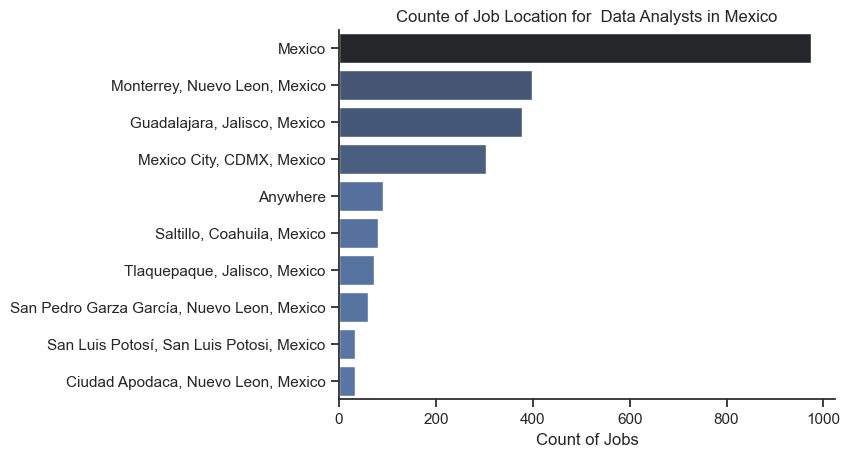

In [3]:
# Top 10 job locations
df_plot = df_da_mexico['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counte of Job Location for  Data Analysts in Mexico')
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.show()


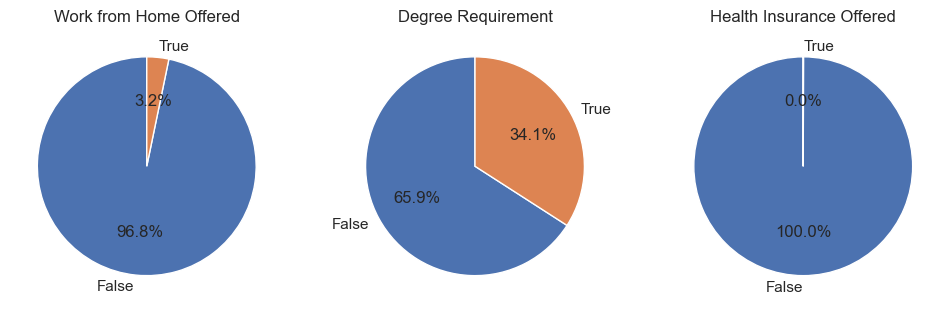

In [4]:
# Pie charts for boolean values
dict_column={
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches([12,5])

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_mexico[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

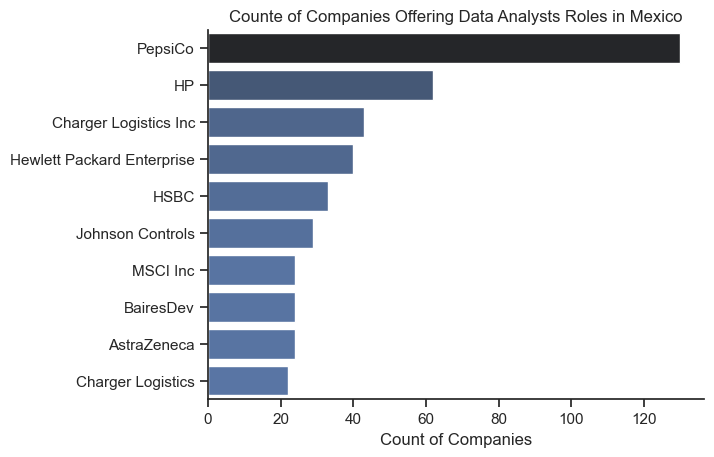

In [ ]:
# Top companies Offering Jobs
df_plot = df_da_mexico['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies Offering Data Analysts Roles in Mexico')
plt.xlabel('Count of Companies')
plt.ylabel('')
plt.show()
